# Data exploration

In [1]:
print('loading libraries...')
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
print('done!')

loading libraries...
done!


In [2]:
#Basic Stats 
fraud = pd.read_csv('Fraud_Data.csv')
fraud.head (10)


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3.987484e+09,0
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1.692459e+09,0
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3.719094e+09,0
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,3.416747e+08,0


In [3]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [13]:
#dataset ipadress basic stats
ipadress = pd.read_csv('IpAddress_to_Country.csv')
ipadress.head(10)

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China
5,16781312.0,16785407,Japan
6,16785408.0,16793599,China
7,16793600.0,16809983,Japan
8,16809984.0,16842751,Thailand
9,16842752.0,16843007,China


In [16]:
# function that takes an IP address as argument and 
# returns country associated based on IP_table
def ip_to_country(ip=None):
    try :
        return ipadress.country[(ipadress.lower_bound_ip_address <= ip) 
                             & (ipadress.upper_bound_ip_address >= ip)].iloc[0]
    except IndexError :
        return "Unknown"     
# To affect a country to each IP :
fraud["ip_country"] = fraud.ip_address.apply(ip_to_country)

KeyboardInterrupt: 

In [14]:
ipadress.shape

(138846, 3)

In [15]:
ipadress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [327]:
fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [47]:
from datetime import datetime
a=[]
b=[]

for i in range(len(fraud['signup_time'])):
    a.append(datetime.strptime(fraud['signup_time'][i], "%Y-%m-%d %H:%M:%S"))
    b.append(datetime.strptime(fraud['purchase_time'][i], "%Y-%m-%d %H:%M:%S"))
    
c=np.array(b)-np.array(a)
fraud['time']=c

u=[]
for i in range(len(fraud['time'])):
    u.append(fraud['time'][i].total_seconds()/60/60/24)
fraud['time']=u

In [64]:
fraud['time']

0         52.160671
1          0.207685
2          0.000012
3          5.695428
4         50.479873
            ...    
151107    60.893900
151108    10.778588
151109    77.333519
151110    59.561563
151111    40.792743
Name: time, Length: 151112, dtype: float64

# Machine learning models

## Logistic regression

In [48]:
features_list = ['purchase_value','source','browser','sex','age','time']
numeric_indices = [0,4,5]
categorical_indices = [1,2,3]
target_variable = 'class'

In [49]:
X = fraud.loc[:, features_list]
Y = fraud.loc[:, target_variable]

In [50]:
#Baseline creation / train_test_split 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [51]:
# OHE / dummyfication
categorical_transformer = OneHotEncoder(drop='first')
numeric_transformer = StandardScaler()
featureencoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_indices),
        ('num', numeric_transformer, numeric_indices)
        ]    )
X_train = featureencoder.fit_transform(X_train)
X_test = featureencoder.transform(X_test)
print("...Done")
print(X_train[0:5,:])

...Done
[[ 0.          0.          1.          0.          0.          0.
   1.          1.31435088 -0.24848017  0.77101733]
 [ 0.          1.          0.          0.          0.          1.
   0.          0.71357738 -0.82821847  1.68780662]
 [ 0.          1.          0.          0.          0.          0.
   1.          1.20511933  0.21531047 -0.61054016]
 [ 0.          0.          0.          0.          0.          1.
   1.         -1.36182199 -0.36442783  0.03672737]
 [ 0.          1.          0.          0.          0.          0.
   1.          0.54973006 -0.82821847 -1.27109614]]


In [52]:
#Model Application 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
y_pred = classifier.predict(X_train)

In [54]:
# Evaluation du modèle 
print("Train score : {}".format(classifier.score(X_train, Y_train)))
print("Test score : {}".format(classifier.score(X_test, Y_test)))

Train score : 0.9069299592355339
Test score : 0.9046270316056965


## Logistic regression 

In [94]:
features_list = ['purchase_value',  'source', 'browser', 'sex','age','time']
target_variable = "class"
X = fraud.loc[:,features_list]
Y = fraud.loc[:,target_variable]

In [95]:
idx = 0
numeric_features = []
numeric_indices = []
categorical_features = []
categorical_indices = []
for i,t in X.dtypes.iteritems():
  if ('float' in str(t)) or ('int' in str(t)) :
    numeric_features.append(i)
    numeric_indices.append(idx)
  else :
    categorical_features.append(i)
    categorical_indices.append(idx)

  idx = idx + 1

print('Found numeric features ', numeric_features,' at positions ', numeric_indices)
print('Found categorical features ', categorical_features,' at positions ', categorical_indices)

Found numeric features  ['purchase_value', 'age', 'time']  at positions  [0, 4, 5]
Found categorical features  ['source', 'browser', 'sex']  at positions  [1, 2, 3]


In [96]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, 
                                                    random_state=0, stratify = Y)
print("...Done.")
print()


Dividing into train and test sets...
...Done.



In [97]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.tolist()
Y_test = Y_test.tolist()
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(Y_train[0:5])
print(Y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[[21 'Direct' 'Safari' 'F' 39 26.86210648148148]
 [20 'SEO' 'Safari' 'M' 25 81.91189814814815]
 [34 'Ads' 'Safari' 'M' 26 115.0678587962963]
 [61 'SEO' 'IE' 'M' 29 83.68515046296297]
 [57 'Ads' 'IE' 'F' 24 61.240682870370364]]
[[69 'Ads' 'IE' 'M' 32 67.0419212962963]
 [35 'SEO' 'IE' 'M' 31 44.07774305555555]]

[0, 0, 0, 0, 0]
[0, 0]


In [98]:
# OHE / dummyfication
categorical_transformer = OneHotEncoder(drop='first')
numeric_transformer = StandardScaler()
featureencoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_indices),
        ('num', numeric_transformer, numeric_indices)
        ]    )
X_train = featureencoder.fit_transform(X_train)
X_test = featureencoder.transform(X_test)
print("...Done")
print(X_train[0:5,:])

...Done
[[ 1.          0.          0.          0.          0.          1.
   0.         -0.86792715  0.67834581 -0.83646066]
 [ 0.          1.          0.          0.          0.          1.
   1.         -0.9224847  -0.94523103  0.68594934]
 [ 0.          0.          0.          0.          0.          1.
   1.         -0.15867899 -0.82926125  1.60288226]
 [ 0.          1.          0.          1.          0.          0.
   1.          1.31437489 -0.48135193  0.73498889]
 [ 0.          0.          0.          1.          0.          0.
   0.          1.09614469 -1.0612008   0.11428388]]


In [78]:
#Model Application 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(class_weight={0:0.096,1:0.904})
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight={0: 0.096, 1: 0.904}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
Y_train_pred = classifier.predict(X_train)
Y_test_pred = classifier.predict(X_test)

In [80]:
# Evaluation du modèle 
print("Train score : {}".format(classifier.score(X_train, Y_train)))
print("Test score : {}".format(classifier.score(X_test, Y_test)))

from sklearn.metrics import f1_score
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

Train score : 0.6571813812671128
Test score : 0.6556926843794462
f1-score on train set :  0.27573792838293637
f1-score on test set :  0.2773611111111111


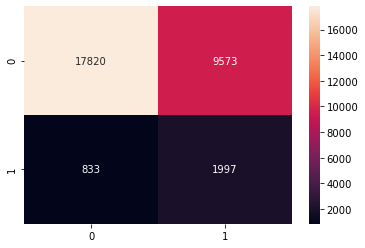

In [81]:
#Correlation matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_test_pred)
sns.heatmap(cm, annot=True, fmt="d")

# Random Forest

In [66]:
param_grid = {"n_estimators": np.arange(20,25),
              "max_depth": np.arange(8,9),
              "min_samples_split":np.arange(2,3)}

# instantiate the Random Forest classifier; criterion =gini 
RandomF1 = RandomForestClassifier(criterion="gini",class_weight={0:0.096,1:0.904})
grid_search = GridSearchCV(n_jobs = -1, estimator=RandomF1, param_grid=param_grid, verbose=10)


grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done  13 out of  25 | elapsed:   18.2s remaining:   16.8s
[Parallel(n_jobs=-1)]: Done  16 out of  25 | elapsed:   19.9s remaining:   11.1s
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   24.4s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:   26.3s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   27.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   27.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.096, 1: 0.904},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                

In [67]:
print("tuned hpyerparameters :(best parameters) ",grid_search.best_params_)
print("accuracy :",grid_search.best_score_)

tuned hpyerparameters :(best parameters)  {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 23}
accuracy : 0.9562904850338372


Accuracy on training set :  0.9563814739140865
Accuracy on test set :  0.9577143235284387
f1-score on train set :  0.69648304840845
f1-score on test set :  0.7086183310533516


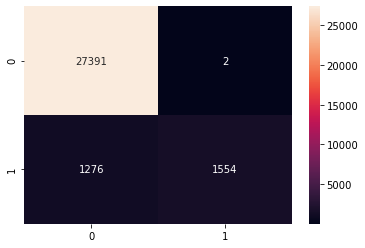

In [68]:
Y_train_pred1 = grid_search.predict(X_train)
Y_test_pred1 = grid_search.predict(X_test)

print("Accuracy on training set : ", accuracy_score(Y_train, Y_train_pred1))
print("Accuracy on test set : ", accuracy_score(Y_test, Y_test_pred1))
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred1))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred1))
cm = confusion_matrix(Y_test, Y_test_pred1)
sns.heatmap(cm, annot=True, fmt="d")


# Multiple models report evaluation

In [111]:
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import recall_score

# prepare models
models = []
models.append(("logreg", LogisticRegression(class_weight={0:0.096,1:0.904})))
models.append(("logreg_gridsearch", LogisticRegression(class_weight={0:0.096,1:0.904},
                                                C= 1.0, max_iter= 100, penalty='l1', solver='liblinear')))
models.append(("RandomF_gini", RandomForestClassifier(n_jobs=-1,criterion="gini",class_weight={0:0.096,1:0.904})))
models.append(("RandomF_entropy", RandomForestClassifier(n_jobs=-1,criterion="entropy",class_weight={0:0.096,1:0.904})))
models.append(("RandomF_gridsearch", RandomForestClassifier(n_jobs=-1,criterion="entropy",class_weight={0:0.096,1:0.904},
                                                               max_depth= 8, min_samples_split= 2, n_estimators= 24)))
models.append(("XGBClf_gridsearch", XGBClassifier(n_jobs=-1,learning_rate = 0.1, max_depth= 1, n_estimators= 10)))
models.append(("Voting",VotingClassifier(
    estimators = [("logreg", LogisticRegression(class_weight={0:0.096,1:0.904})), 
                  ("logreg_gridsearch", LogisticRegression(class_weight={0:0.096,1:0.904},
                                                C= 1.0, max_iter= 100, penalty='l1', solver='liblinear')), 
                  ("RandomF_gini", RandomForestClassifier(n_jobs=-1,criterion="gini",class_weight={0:0.096,1:0.904})),
                  ("RandomF_entropy", RandomForestClassifier(n_jobs=-1,criterion="entropy",class_weight={0:0.096,1:0.904})),
                  ("RandomF_gridsearch", RandomForestClassifier(n_jobs=-1,criterion="entropy",class_weight={0:0.096,1:0.904},
                                                               max_depth= 8, min_samples_split= 2, n_estimators= 24)),
                  ("XGBClf_gridsearch", XGBClassifier(n_jobs=-1,learning_rate = 0.1, max_depth= 1, n_estimators= 10))])))
s=[]
c=[]
d=[]
e=[]
f=[]
g=[]


# Fit and predict
for name, model in models:
    model = model.fit(X_train, Y_train)
    Y_pred_test = model.predict(X_test)
    Y_pred_train = model.predict(X_train)
    s.append(accuracy_score(Y_train,Y_pred_train ))
    c.append(accuracy_score(Y_test, Y_pred_test ))
    d.append(f1_score(Y_train, Y_pred_train))
    e.append(f1_score(Y_test, Y_pred_test ))
    f.append(recall_score(Y_train, Y_pred_train))
    g.append(recall_score(Y_test, Y_pred_test ))

In [112]:
Score=[]
Score=pd.DataFrame(Score)
names=["logreg","logreg_gridsearch","RandomF_gini","RandomF_entropy","RandomF_gridsearch","XGBClf_gridsearch","Voting"]

Score['Models']= names
Score['F1_test']=np.round(e,5)
Score['F1_train']=np.round(d,5)
Score['Accur_test']=np.round(c,4)
Score['Accur_train']=np.round(s,4)
Score['Recall_test']=np.round(g,4)
Score['Recall_train']=np.round(f,4)

In [113]:
Score

,Models,F1_test,F1_train,Accur_test,Accur_train,Recall_test,Recall_train
0,logreg,0.27736,0.27574,0.6557,0.6572,0.7057,0.6968
1,logreg_gridsearch,0.27736,0.27562,0.6557,0.6571,0.7057,0.6967
2,RandomF_gini,0.70410,0.99938,0.9568,0.9999,0.5495,0.9988
3,RandomF_entropy,0.70309,0.99943,0.9565,0.9999,0.5502,0.9989
4,RandomF_gridsearch,0.70894,0.69634,0.9578,0.9564,0.5491,0.5341
5,XGBClf_gridsearch,0.70894,0.69626,0.9578,0.9564,0.5491,0.5341
6,Voting,0.70797,0.82079,0.9576,0.9715,0.5491,0.6961


In [340]:
Y_pred_1 = clf1.predict(X_train)
Y_pred_2 = clf1.predict(X_test)

In [341]:
#f1_score on the Y_train 
f1_score(Y_train, Y_pred_1)

0.6698274992434178

In [342]:
#f1_score on the Y_test
f1_score(Y_test, Y_pred_2)

0.47473329590117913

In [343]:
# instantiate the Random Forest classifier;criterion =entropy
RandomF2 = RandomForestClassifier(criterion="entropy",class_weight={0:0.096,1:0.904})

In [344]:
# fit the classifier to the imbalanced data
clf2 = RandomF2.fit(X_train, Y_train)

In [345]:
Y_pred_3 = clf1.predict(X_train)
Y_pred_4 = clf1.predict(X_test)

In [346]:
#f1_score on the Y_train 
f1_score(Y_train, Y_pred_3)

0.6698274992434178

In [347]:
#f1_score on the Y_test
f1_score(Y_test, Y_pred_4)

0.47473329590117913